In [13]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [14]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_2/data/regression_train.csv'
test_path = '/content/gdrive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_2/data/regression_test.csv'
### ========== TODO : END ========== ###

In [16]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [17]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [18]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [19]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [20]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        # Phi = X
        m = self.m_

        Phi = np.empty((n,m+1))
        for r in range(0, n):
          # first column of every row has value 1
          Phi[r][0] = 1

          # set the rest of the columns
          for c in range(1, m+1):
            Phi[r][c] = X[r][0]**c

        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+t)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            error_vector = np.dot(X, self.coef_) - y
            scaled_feature_vectors = np.dot(np.matrix.transpose(X), error_vector)
            self.coef_ = self.coef_ - 2*eta*scaled_feature_vectors

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        XTy = np.dot(np.matrix.transpose(X), y)
        XTX_inv = np.linalg.pinv(np.dot(np.matrix.transpose(X), X))
        self.coef_ = np.dot(XTX_inv, XTy)
        
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        squared_errors = (self.predict(X) - y)**2
        cost = np.sum(squared_errors)
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n, d = X.shape
        error = np.sqrt(self.cost(X, y)/n)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...
train_data:


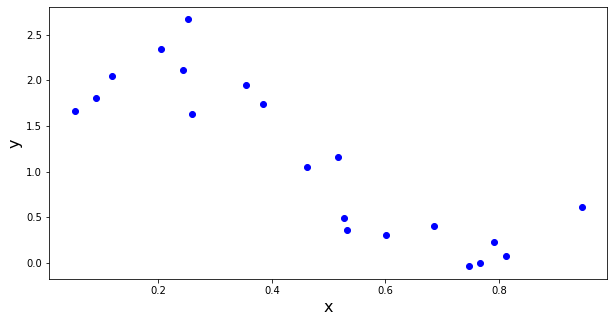

test_data:


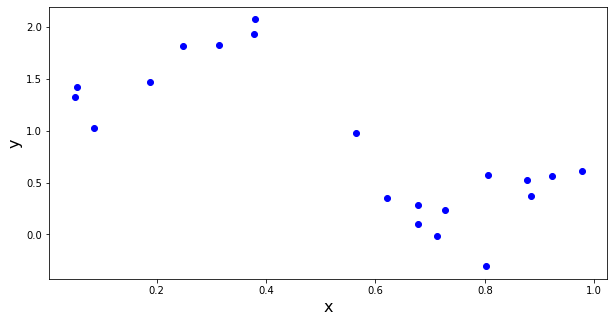

Investigating linear regression...
********************** cost function check **********************
the following value should be 40.234:  40.233847409671
stats for learning_rate =  1e-06
number of iterations: 10000
coefficients =  [0.36400847 0.09215787]
final value of J(theta) =  25.86329625891011
stats for learning_rate =  1e-05
number of iterations: 10000
coefficients =  [ 1.15699657 -0.22522908]
final value of J(theta) =  13.158898555756045
stats for learning_rate =  0.001
number of iterations: 7020
coefficients =  [ 2.4464068 -2.816353 ]
final value of J(theta) =  3.9125764057919463
stats for learning_rate =  0.0168
number of iterations: 456
coefficients =  [ 2.44640704 -2.81635348]
final value of J(theta) =  3.91257640579148
********************** closed form **********************
coefficients for closed form solution =  [ 2.44640709 -2.81635359]
final cost for closed form solution =  3.9125764057914636
********************** dynamic learning rate **********************
number

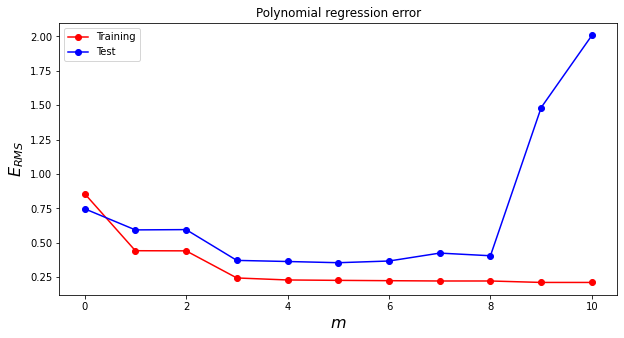

Done!


<Figure size 432x288 with 0 Axes>

In [21]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    print("train_data:")
    plot_data(train_data.X, train_data.y)
    print('test_data:')
    plot_data(test_data.X, test_data.y)
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')

    # testing PolynomialRegression.cost
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print('********************** cost function check **********************')
    print('the following value should be 40.234: ',
          model.cost(train_data.X, train_data.y))

    # testing PolynomialRegression.fit_GD
    learning_rates = [10**-6, 10**-5, 10**-3, 0.0168]
    for rate in learning_rates:
      print('===========================')
      print('stats for learning_rate = ', rate)
      model.fit_GD(train_data.X, train_data.y, eta=rate)
      print('coefficients = ', model.coef_)
      print('final value of J(theta) = ', model.cost(train_data.X, train_data.y))

    # testing PolynomialRegression.fit
    model.fit(train_data.X, train_data.y)
    print('********************** closed form **********************')
    print('coefficients for closed form solution = ', model.coef_)
    print('final cost for closed form solution = ',
          model.cost(train_data.X, train_data.y))
    
    # testing dynamic learning rate
    print('********************** dynamic learning rate **********************')
    model.fit_GD(train_data.X, train_data.y)
    print('coefficients for dynamic learning rate = ', model.coef_)
    print('final cost for dynamic learning rate = ',
          model.cost(train_data.X, train_data.y))
        
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')

    # test PolynomialRegression.generate_polynomial_features(..)
    print('********************** generate_poly_features for m>1 **********************')
    mult_model = PolynomialRegression(4)
    arr = np.array([[2], [3], [4], [5]])
    print("should ouptut a (4, 5) array of polynomial features: \n",
          mult_model.generate_polynomial_features(arr))
    
    # part i: plot of train/test errors vs model complexity
    print('********************** plot rms error **********************')
    m = 10
    train_error = []
    test_error = []
    for i in range(m+1):
      new_model = PolynomialRegression(i)
      new_model.fit(train_data.X, train_data.y)
      train_error.append(new_model.rms_error(train_data.X, train_data.y))
      test_error.append(new_model.rms_error(test_data.X, test_data.y))

    print("train_error: ", train_error)
    print("test_error: ", test_error)
    plot_erms([i for i in range(m+1)], train_error, test_error)
        
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__":
    main()
